In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load/clean data module

In [3]:
# wrangle data module

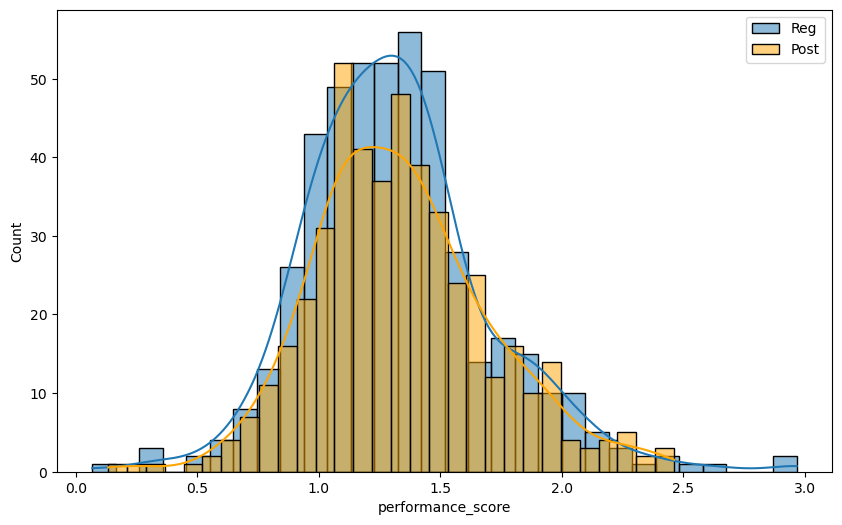

In [2]:
# EDA

#Read in master datasets

final_reg_norm = pd.read_csv("reg_norm_metric.csv")
final_post_norm = pd.read_csv("post_norm_metric.csv")

#Histograms

plt.figure(figsize=(10, 6))
sns.histplot(data=final_reg_norm, x='performance_score', bins=30, kde=True, label='Reg')
sns.histplot(data=final_post_norm, x='performance_score', bins=30, kde=True, color='orange', label='Post')
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22ce21b4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x22ce2190ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ce2181a90>,
 'medians': [<matplotlib.lines.Line2D at 0x22ce21b7050>,
 'fliers': [<matplotlib.lines.Line2D at 0x22ce21b7890>,
 'means': []}

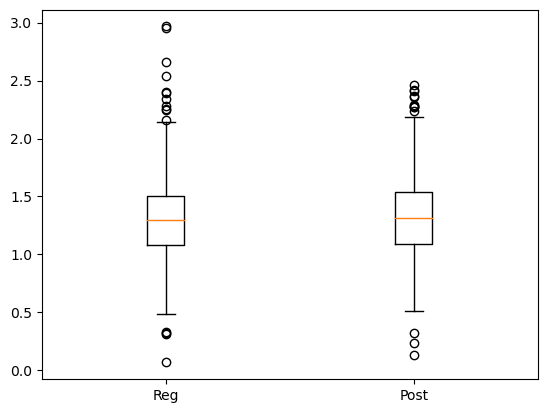

In [4]:
#Boxplots 

# Assuming 'target_variable' is the variable you want to compare
target_variable_reg = final_reg_norm['performance_score']
target_variable_post = final_post_norm['performance_score']

# Create a box plot
plt.boxplot([target_variable_reg, target_variable_post], labels=['Reg', 'Post'])

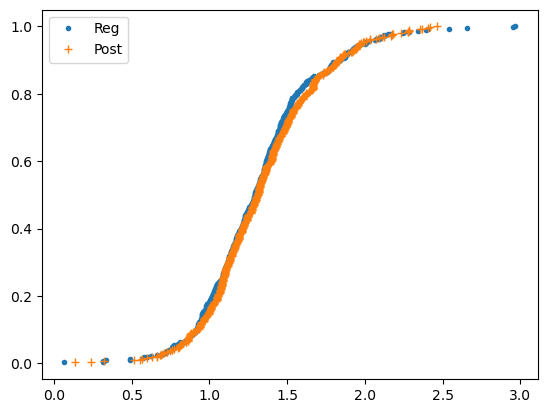

In [11]:
#ECDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array of data."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Compute ECDF for before and after data
x_before, y_before = ecdf(target_variable_reg)
x_after, y_after = ecdf(target_variable_post)

# Plot ECDFs
plt.plot(x_before, y_before, marker='.', linestyle='none', label='Reg')
plt.plot(x_after, y_after, marker='+', linestyle='none', label='Post')
plt.legend()

In [11]:
# REGRESSION

# Assuming 'player_name' is the index column, you might need to adjust it
final_post_norm.set_index('Player', inplace=True)
final_reg_norm.set_index('Player', inplace=True)

# Select the common columns for X
X_columns = ['Age', 'performance_score', 'years_league', 'years_playoff']

# Align indices and select columns for X
X = sm.add_constant(final_reg_norm.loc[:, X_columns])

# Align indices and select columns for Y
Y = final_post_norm[['performance_score']]

# Fit the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_score   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     54.24
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.67e-37
Time:                        16:04:02   Log-Likelihood:                -103.21
No. Observations:                 469   AIC:                             216.4
Df Residuals:                     464   BIC:                             237.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6112      0.10